# Работа 1.2.5 Исследование вынужденной регулярной прецессии гироскопа
---
---

### Цель работы 



- исследовать вынужденную прецессию гироскопа
- установить зависимость скорости вынужденной прецессии от величины момента сил, действующих на ось гироскопа
- определить скорость вращения ротора гироскопа и сравнить ее со скоростью, рассчитанной по скорости прецессии

### Оборудование


- гироскоп
- секундомер
- набор грузов 
- отдельный ротор гироскопа
- цилиндр известной массы
- крутильный маятник
- штангенциркуль
- линейка

## Теория
---

$$ \frac{d \vec{L}}{dt} = \vec{M} = \Omega \times \vec{L}$$

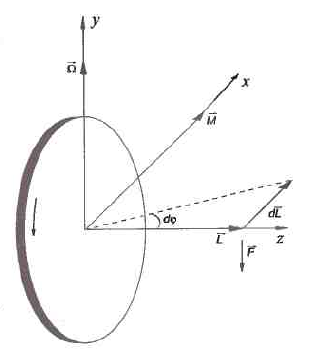

Под действием момента М внешних сил ось гироскопа медленно вращается вокруг оси у с угловой скоростью $ \Omega $.  


Такое движение называется регулярной прецессией гироскопа.    

В частности, создающей момент внешней силой может оказаться сила тяжести, если центр масс
гироскопа, не совпадает с точкой подвеса. Для гироскопа массой $m$,
у которого ось собственного вращения наклонена на угол $\alpha$ от вертикали, скорость прецессии, происходящей вокруг вертикальной оси под
действием силы тяжести, равна

$$ \Omega = \frac{m_{г}gl_{ц}}{I_{z}\omega_{0}} $$

Если подвесить к оси гироскопа дополнительные грузы, это сместит общий центр масс и создаст момент сил тяжести, вызывающий прецессию.

Скорость прецессии 
$$ \Omega = \frac{mgl}{I_{z}\omega_{0}} $$

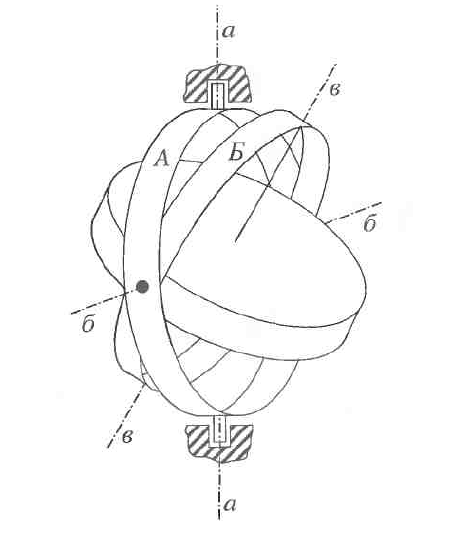 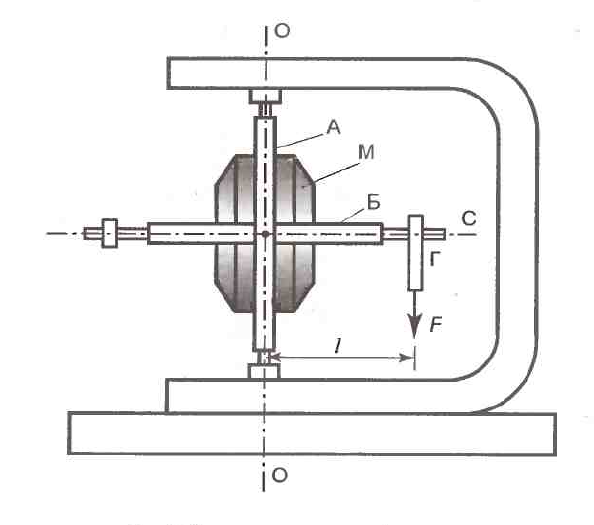

Центр масс в нашей установке при любом повороте сохраняет свое положение в пространстве

### Определение момента инерции ротора

Момент инерции ротора относительно оси симметрии $I_{0}$ измеряется по крутильным колебаниям точной копии ротора, подвешиваемой
вдоль оси симметрии на жесткой проволоке. 

Период крутильных колебаний $T_{0}$ зависит от момента инерции $I_{0}$ и модуля кручения проволоки $f$:


$$ T_{0} = 2\pi\sqrt{\frac{I_{0}}{f}}$$

Что делать с модулем кручения проволоки? Его можно исключить:


Подвесим вместо ротора гироскопа к той же проволоке **цилиндр** правильной формы, момент инерции которого $I_{ц}$ мы можем легко посчитать, и получим пропорцию:

$$ I_{0} = I_{ц} \frac{T_{0}^{2}}{T_{ц}^{2}} $$

### Скорость вращения ротора

Скорость вращения ротора гироскопа можно определить и не при
бегая к исследованию прецессии. 

У используемых в работе гироскопов статор имеет две обмотки, необходимые для быстрой раскрутки
гироскопа. Одну обмотку используют для раскрутки
гироскопа, а вторую - для измерения числа оборотов ротора. 

Ротор электромотора всегда немного намагничен. Вращаясь, он наводит во
второй обмотке переменную электродвижушую силу (ЭДС) индукции,
частота которой равна частоте врашения ротора. 


Частоту этой ЭДС
можно, в частности, измерить по фигурам Лиссажу, получаемым на экране осциллографа

## Ход работы
---

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import math


In [35]:
m_1 = 0.0567 # кг
m_2 = 0.0768 # кг
m_3 = 0.0911 # кг
m_4 = 0.1152 # кг
m_5 = 0.1419 # кг
m_6 = 0.1739 # кг
m_7 = 0.3285 # кг

m = [0.0567, 0.0768, 0.0911, 0.1152, 0.1419, 0.1739, 0.3285]

sigma_m = 0.0001 # кг


Плечо силы mg 

In [36]:
l = 0.12 # м

sigma_l = 0.001 # м


Момент силы $M$

In [37]:
M = [m * l for m in m]


$$ \sigma_{M} = \sqrt{(\sigma_{m} l)^2 + (\sigma_{l} m)^2} $$

In [38]:
sigmas_M = [math.sqrt((sigma_m * l) ** 2) +
                      (sigma_l * m) ** 2 for m in m]

sigmas_M


[1.200321489e-05,
 1.200589824e-05,
 1.200829921e-05,
 1.201327104e-05,
 1.202013561e-05,
 1.203024121e-05,
 1.210791225e-05]

Видно, что $\sigma_{M}$ меньше $M$ на несколько порядков, ими можно пренебречь 

In [39]:
T_1 = 179   # c
T_2 = 134   # c
T_3 = 112   # c
T_4 = 89.5  # c
T_5 = 72.5  # c
T_6 = 59    # c
T_7 = 31.3  # c

T = [179, 134, 112, 89.5, 72.5, 59 , 31.3]


$$ \sigma_{T} = 1 ~с$$

In [40]:
sigma_T = 1 # с


$$ \Omega = \frac{2\pi}{T} $$

In [41]:
omega_prec = [2 * math.pi / T for T in T]


$$ \sigma_{\Omega} = \frac{2 \pi \sigma_{T}}{T^2} $$

In [42]:
sigmas_omega_prec = [2 * math.pi * sigma_T / T ** 2 for T in T]


In [43]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)


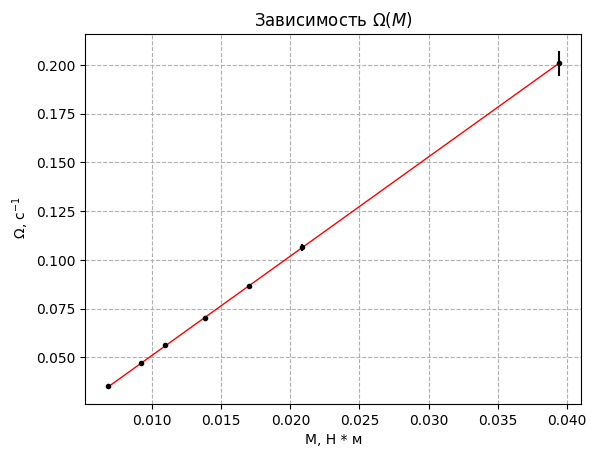

In [44]:
plt.figure()
plt.ylabel(" $\Omega$, c$^{-1}$")
plt.xlabel("M, Н * м")
plt.title('Зависимость $\Omega$($M$)')
plt.grid(True, linestyle = '--')
plt.errorbar( M, omega_prec, xerr= sigmas_M, yerr= sigmas_omega_prec , fmt = '.k')

x = np.array([min(M), max(M)])

k, b, k_err, b_err = LeastSquares(M, omega_prec)
plt.plot(x, k*x + b , color = 'r', linewidth = 1, label = "линия")
